In [1]:
import pickle
import copy
import matplotlib.pyplot as plt

In [7]:
with open("AB.pickle", 'rb') as handle:
    ab = pickle.load(handle)
with open("CD.pickle", 'rb') as handle:
    cd = pickle.load(handle)

In [8]:
ab_new = {}
for x in ab.keys():
    new_key = x+len(ab)
    ab_new[new_key] = copy.deepcopy(ab[x])
    ab_new[new_key]['material_content_pack']['anode active material (natural graphite)']=ab_new[new_key]['material_content_pack']['anode active material (synthetic graphite)']
    ab_new[new_key]['material_content_pack']['anode active material (synthetic graphite)'] = 0
    ab_new[new_key]['general_battery_parameters']['graphite_type'] = 'natural'
    
ab.update(ab_new)
    

In [9]:
cd_new = {}

for x in cd.keys():
    key = x+len(ab)
    new_key = x+len(ab)+len(cd)
    cd_new[key] = cd[x]
    cd_new[new_key] = copy.deepcopy(cd[x])
    cd_new[new_key]['material_content_pack']['anode active material (natural graphite)']=cd_new[new_key]['material_content_pack']['anode active material (synthetic graphite)']
    cd_new[new_key]['material_content_pack']['anode active material (synthetic graphite)'] = 0
    cd_new[new_key]['general_battery_parameters']['graphite_type'] = 'natural'
    


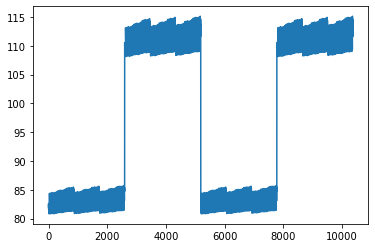

In [14]:
plt.plot([cd_sorted[x]['general_battery_parameters']['pack_usable_energy_kWh'] for x in cd_sorted.keys()])

In [13]:
cd_sorted = {k: cd_new[k] for k in sorted(cd_new)}

dict_all = {**ab, **cd_new}

In [15]:
import pandas as pd

df_par = pd.DataFrame.from_dict([dict_all[x]['general_battery_parameters'] for x in dict_all.keys()])
df_mc = pd.DataFrame.from_dict([dict_all[x]['material_content_pack'] for x in dict_all.keys()])

df_mc.to_excel('3_MC_battery_pack_material.xlsx')
df_par.to_excel('3_PAR_battery_design_parameters.xlsx')